In [29]:
import pickle
import os
root = '/Users/zhongshannan/Documents/fakenews_detection/dataset/'
with open(os.path.join(root + 'weiboBdata.pickle'), 'rb') as f:  
    data = pickle.loads(f.read())

In [30]:
print(data.keys())
print(len(data['id']))

dict_keys(['id', 'text', 'image', 'label', 'event'])
20379


In [31]:
import pandas as pd
column1 = pd.DataFrame(columns = ['text'] , data=data['text'])
column2 = pd.DataFrame(columns = ['label'] , data=data['label'])
column3 = pd.DataFrame(columns = ['event'] , data=data['event'])
df = pd.concat([column1,column2,column3], axis=1)
df

,text,label,event
0,//分享网易新闻:《发生在昆明的火锅店老板“辱滇门”，云南人该愤怒还是羞愧》|发生在昆明.....,0,社会生活
1,西宁城管围殴民警扬言要把警察打死|西宁城管围...,0,社会生活
2,【川航航班因驾驶舱风挡破裂安全备降成都】今天上午6:26从重庆江北国际机场出发前往拉萨的四川...,0,社会生活
3,#地震快讯#中国地震台网自动测定：08月08日21时19分在四川阿坝州九寨沟县附近（北纬33...,0,社会生活
4,#长沙身边事#【石门-常德-长沙动车时刻表出炉9月21日开行】来了，来了，石长铁路动车真的来...,0,社会生活
...,...,...,...
20374,2015年4月19日上午，朋友家三岁多小女孩在锦绣花园小区附近被人拐走了，小女孩能说出她爸爸...,1,社会生活
20375,寻人启事13940292999。有线索酬金10万帮忙扩散，今天上午一个三岁多小女孩在海城嘉和...,1,社会生活
20376,昨晚青岛暴雨，一人不幸被雷电击中，吸浮到空中，在空中并且多次被雷击，场面十分恐怖惊人,1,社会生活
20377,是我朋友的孩子帮帮忙谢谢！寻人启事13940292999。有线索酬金10万帮忙扩散，今天上午...,1,社会生活


In [34]:
df['label'].value_counts()

1    10334
0    10045
Name: label, dtype: int64

In [35]:
df['event'].value_counts()

社会生活    12576
医药健康     3731
文体娱乐     1440
政治        919
财经商业      911
教育考试      360
军事        259
科技        183
Name: event, dtype: int64

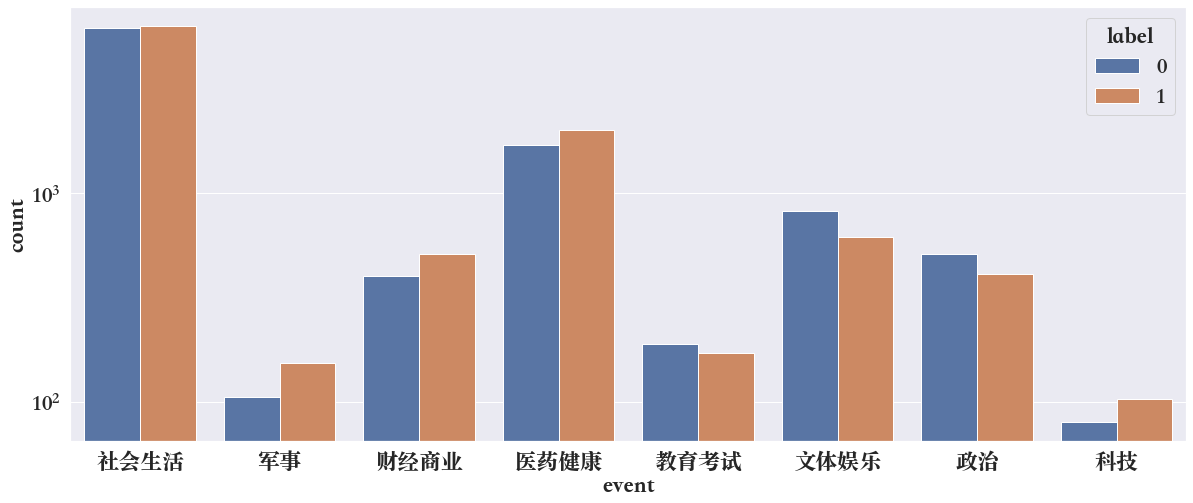

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm,os
# 中文字体
myfont = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/Songti.ttc',size=10)

sns.set_theme(style="ticks", color_codes=True)

plt.figure(figsize=(20, 8))
sns.set(font_scale=2, font=myfont.get_name())
ax = sns.countplot(x="event", hue="label", data=df)
ax.set_yscale("log")

# 调整图例位置（靠左距离，靠下距离）
# ax.legend(loc='center right', bbox_to_anchor=(0.13,0.90), ncol=1)

plt.show()

In [53]:
df1 = df[df['event'] == '社会生活']
df1.drop(['label'],axis=1,inplace=True)
df1.drop(['event'],axis=1,inplace=True)

root = '/Users/zhongshannan/Documents/fakenews_detection/dataset/weibo数据集处理/'
df1.to_csv(os.path.join(root+'social_life.csv'),index=0)

/var/folders/vz/h2_p04597j1dw_q3wbgtg23w0000gn/T/ipykernel_69060/1490226104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['label'],axis=1,inplace=True)
/var/folders/vz/h2_p04597j1dw_q3wbgtg23w0000gn/T/ipykernel_69060/1490226104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['event'],axis=1,inplace=True)


In [74]:
import pandas as pd
import os
data = pd.read_csv(os.path.join(root+'social_life.csv'), encoding='utf-8')
with open(os.path.join(root+'social_life.txt'),'w+', encoding='utf-8') as f:
    for line in data.values:
        f.write(line[0] + '\n')

In [75]:
import logging
import collections
import re
import math
import jieba
from wordcloud import WordCloud
jieba.setLogLevel(logging.INFO)
import os

root_path = '/Users/zhongshannan/Documents/fakenews_detection/dataset/weibo数据集处理/'

def stopwordslist():
    stopwords = [line.strip() for line in open(os.path.join(root_path, 'stop_words.txt'), encoding='UTF-8').readlines()]
    stopwords = [k for s in stopwords for k in s]
    return stopwords

f = open(os.path.join(root_path, 'social_life.txt'), "r", encoding="utf-8")
text = f.read()
f.close()

TopWordFrequencyPercentage = 20
TopWordFrequencyPercentage /= 100

# jieba分词
seg = jieba.cut(text)
seg = " ".join(seg)
seg = seg.strip()
seg = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:：。？、~@#￥%……&*（）]+", " ", seg)
seg = seg.split(" ")
seg = list(filter(None, seg))
stopwords = stopwordslist()
seg = [v for v in seg if v not in stopwords]
word_counts = collections.Counter(seg)

from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# 生成词云
wc = WordCloud(
    max_words=math.ceil(len(word_counts) * TopWordFrequencyPercentage),
    width=500,
    height=350,
    max_font_size=50,
    min_font_size=10,
    font_path='/System/Library/Fonts/Supplemental/Songti.ttc',
    background_color='white',
    colormap=cmap,
)

wc.generate_from_frequencies(word_counts)

PicSavePath = "social_life.png"
wc.to_file(PicSavePath)